### Importing all necessary modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

### Reading csv file and checking the first 5 rows

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping unwanted column

In [3]:
bike.drop(columns='instant', axis=1, inplace = True)

### Using Datetime module to read the date column

In [4]:
bike.dteday = bike.dteday.apply(lambda x : datetime.strptime(x, "%d-%m-%Y"))

In [5]:
bike.dteday = pd.to_datetime(bike.dteday)

### Quality Check

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


In [7]:
bike.shape

(730, 15)

In [8]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Handling Categorical Variables

In [10]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

# Converting into Categorical Variables

In [12]:
bike['season'] = bike.season.map({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 :'Winter' })
bike['weathersit'] = bike.weathersit.map({1: 'Clear', 2: 'Mist + Few Clouds', 3 : 'Light Rain + Snow', 
                                          4 : 'Heavy Rain + Thunderstorm'})

bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,1,0,6,0,Mist + Few Clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,Spring,0,1,0,0,0,Mist + Few Clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Analysis of Numerical Variables

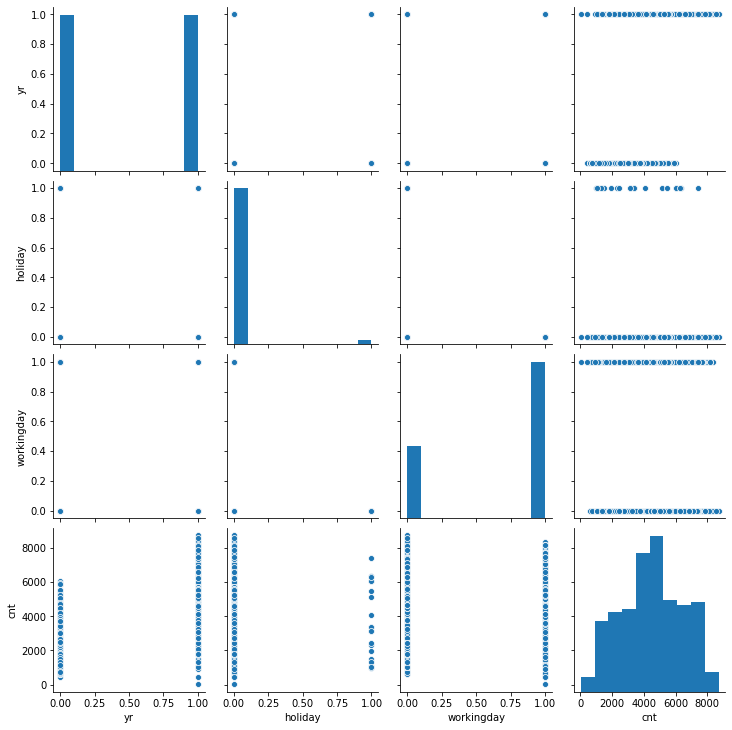

In [13]:
sns.pairplot(bike, x_vars=['yr', 'holiday', 'workingday', 'cnt'], 
            y_vars=['yr', 'holiday', 'workingday', 'cnt'])
plt.show()

### Analysis from the above pairplot:
- We can clearly see that total count is highly related to features holiday, which basically tells us that there are more booking done on a non-holiday.
- Also 2019 registered more bookings compared to 2018. 

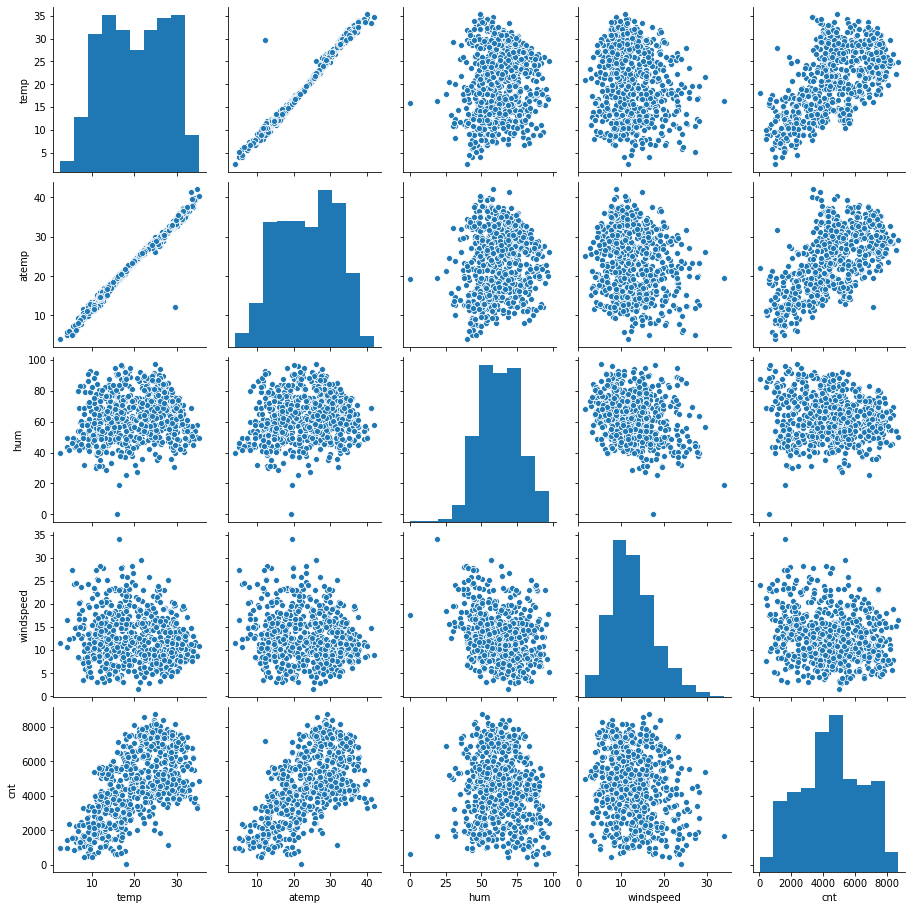

In [14]:

sns.pairplot(bike, x_vars=['temp', 'atemp', 'hum', 'windspeed','cnt'], 
            y_vars=['temp', 'atemp', 'hum', 'windspeed','cnt'])
plt.show()

### Analysis from the above pairplot:
- We can see that the relationship between total count and temperature and actual temperature is similar so for our analysis we can drop either one, ideally the one which is less correlated to the total count(multicollinearity). Also we can clearly observe that total count increases with increase in temp and during low temperature the booking numbers drop.
- There are very few booking which the humidity is low(ie < 25) or when the windspeed is very high(ie > 30).

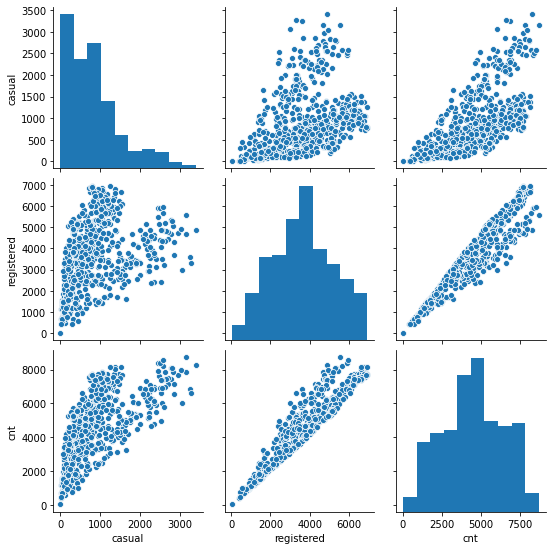

In [15]:
sns.pairplot(bike, x_vars=['casual', 'registered','cnt'], 
            y_vars=['casual', 'registered','cnt'])
plt.show()

# Analysis from the above pairplot:
- Casual and Registered users are highly correlated to the total booking count.
- Registered users have a very high positive linear association with the total booking count.

# Analysis of Categorical Variables

In [16]:
bike.groupby('yr')[['cnt']].sum().sort_values('cnt', ascending = False)

,cnt
yr,
1,2047742
0,1243103


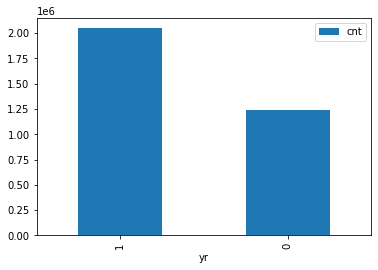

In [17]:
bike.groupby('yr')[['cnt']].sum().sort_values('cnt', ascending = False).plot.bar()
plt.show()

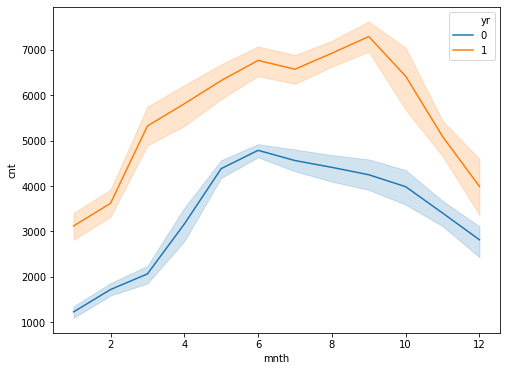

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(x='mnth', y='cnt', data=bike, hue = 'yr')
plt.show()

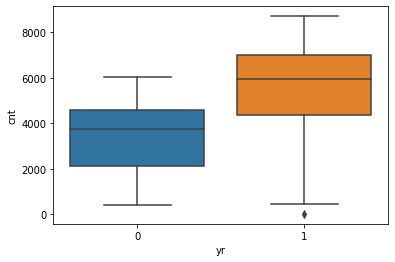

In [19]:
sns.boxplot(data=bike, x='yr', y='cnt')
plt.show()

In [20]:
bike[bike.cnt<100]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
666,2019-10-29,Winter,1,10,0,1,1,Light Rain + Snow,18.04,21.97,88.0,23.9994,2,20,22


- Only 1 day has a very low count ie. less than 100. This can be considered as an outlier and dropped.
- 2019 recorded more bookings compared to 2018, however the trend in terms of season and weather remained almost the same throughout both the years.

In [21]:
bike = bike[~(bike.cnt<100)]

In [22]:
bike.groupby('mnth')[['cnt']].sum().sort_values('cnt', ascending = False)

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322330
4,269094
11,254831
3,228920


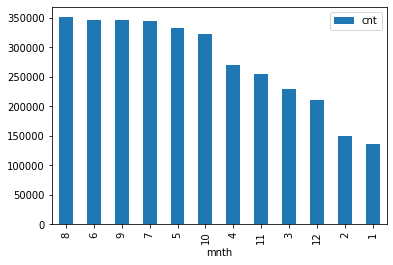

In [23]:
bike.groupby('mnth')[['cnt']].sum().sort_values('cnt', ascending = False).plot.bar()
plt.show()

- Spring: March - May
- Summer: June - August
- Fall: September - November
- Winter: December - February

In [24]:
bike.groupby('season')[['cnt']].sum().sort_values('cnt', ascending = False)

,cnt
season,
Fall,1061129
Summer,918589
Winter,841591
Spring,469514


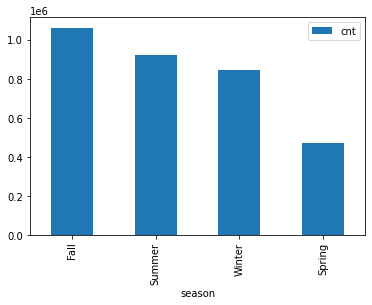

In [25]:
bike.groupby('season')[['cnt']].sum().sort_values('cnt', ascending = False).plot.bar()

plt.show()

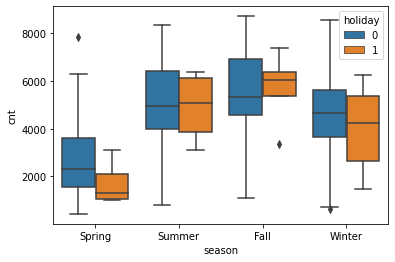

In [26]:
sns.boxplot(data=bike, x='season', y='cnt', hue='holiday')
plt.show()

- Months and Season provides us with a clear picture that booking during Fall and Summer are the highest.

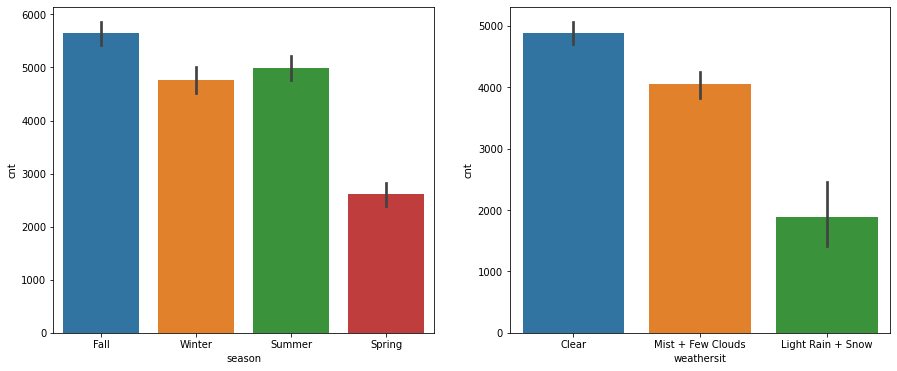

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(data=bike.sort_values('cnt', ascending = False), x='season', y='cnt')

plt.subplot(1,2,2)
sns.barplot(data=bike.sort_values('cnt', ascending = False), x='weathersit', y='cnt')

plt.show()

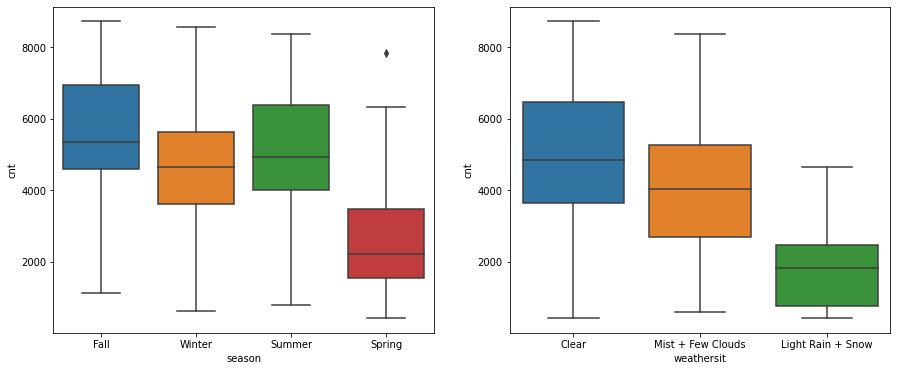

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=bike.sort_values('cnt', ascending = False), x='season', y='cnt')
plt.subplot(1,2,2)
sns.boxplot(data=bike.sort_values('cnt', ascending = False), x='weathersit', y='cnt')
plt.show()

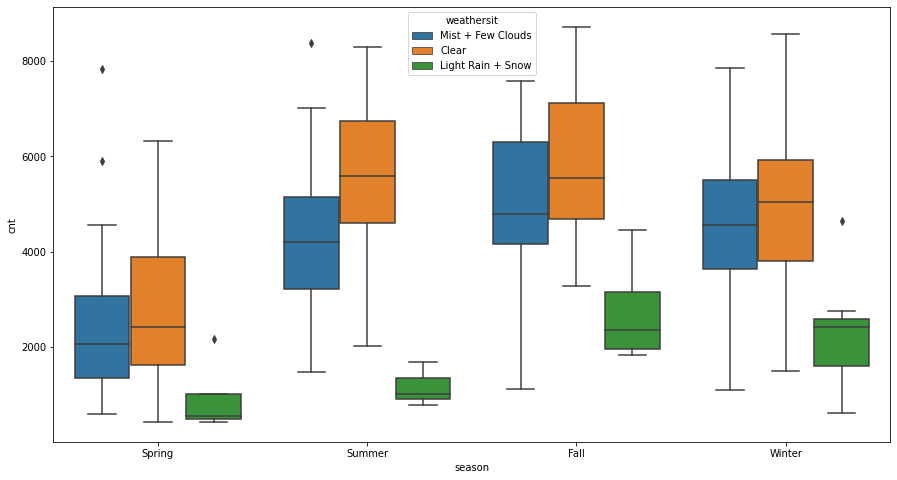

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(data=bike, x='season', y='cnt', hue='weathersit')
plt.show()

- From the above graphs, we can infer that most of the bookings are made on a clear day and when its misty with few clouds, however if its raining or snowing then the number of bookings are less.

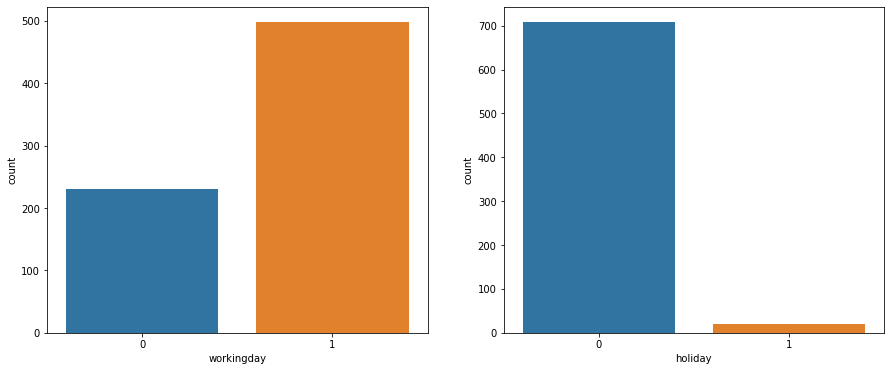

In [30]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=bike, x='workingday')

plt.subplot(1,2,2)
sns.countplot(data=bike, x='holiday')

plt.show()

- Number of bookings reduce drastically on a holiday/weekend.

In [31]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,1,0,6,0,Mist + Few Clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,Spring,0,1,0,0,0,Mist + Few Clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Converting Seasons and Weather columns into Dummies for Modelling

In [32]:
season = pd.get_dummies(bike.season, drop_first= True)
weather = pd.get_dummies(bike.weathersit, drop_first= True)

bike = pd.concat([bike, season, weather], axis= 1)

### Dropping non numerical columns and columns not needed for Modelling from the dataset

In [33]:
bike1 = bike.drop(columns=['dteday','mnth','weekday','season', 'weathersit', 'casual','registered', 'temp'])

In [34]:
bike1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Rain + Snow,Mist + Few Clouds
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### We have decided to drop temp coloum and keep atemp. Both are highly correlated to the target variable and also related to each other. atemp is basically the actual temp and hence we should consider this variable while building our model.

### Splitting the dataset before scaling

In [35]:
df_train , df_test = train_test_split(bike1, train_size = 0.7, random_state = 100)

In [36]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Rain + Snow,Mist + Few Clouds
625,1,0,1,28.25335,87.2500,23.958329,4073,0,0,0,0,1
363,0,0,1,15.94060,63.6667,9.000579,2999,1,0,0,0,0
425,1,0,1,17.99210,65.7083,9.708568,3194,1,0,0,0,1
728,1,0,0,11.58500,48.3333,23.500518,1796,1,0,0,0,0
481,1,0,1,22.63185,40.0833,23.291411,6233,0,1,0,0,0


### Rescaling Variables

- We will be rescaling variables temp, atemp, humidity, windspeed, casual, registered and total count.
- Since most of the values are in 1's and 0's ie binary, I believe MinMax Scaler is the best choice as it converts the variables in the range of 0 to 1.

In [37]:
scaler = MinMaxScaler()
var = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [38]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Rain + Snow,Mist + Few Clouds
625,1,0,1,0.637937,0.899098,0.677796,0.439696,0,0,0,0,1
363,0,0,1,0.314694,0.656076,0.197852,0.310033,1,0,0,0,0
425,1,0,1,0.368552,0.677114,0.220569,0.333575,1,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.164795,1,0,0,0,0
481,1,0,1,0.490358,0.413052,0.656397,0.700471,0,1,0,0,0


### Checking Correlation between Dependent Variable 'cnt' & Independent Variables

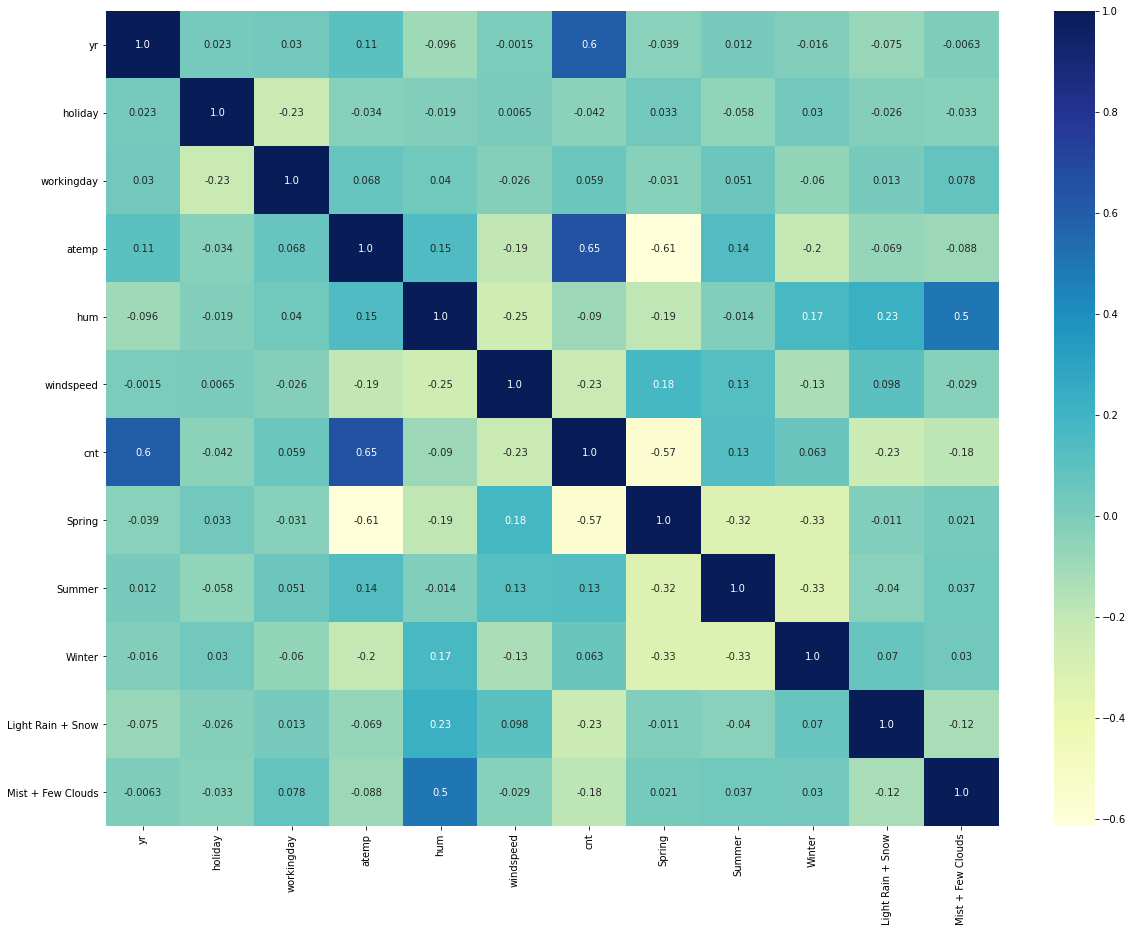

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), annot= True, cmap='YlGnBu', fmt=".2")
plt.show()

### As seen in the heatmap, the target variable is highly correlated to year and temp. Even spring is highly correlated however it is inversely or we can say it has a negative correlation with the target variable.
### Creating a correlation dataframe between independent variables and target variables and sorting them in desending order.

In [40]:
corr = df_train.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values('Correlation_abs', ascending = False, inplace = True)
corr_df[(corr_df.Var1=='cnt') | (corr_df.Var2=='cnt')]

,Var1,Var2,Correlation,Correlation_abs
75,cnt,atemp,0.652385,0.652385
72,cnt,yr,0.596620,0.596620
90,Spring,cnt,-0.565965,0.565965
126,Light Rain + Snow,cnt,-0.233875,0.233875
77,cnt,windspeed,-0.226687,0.226687
138,Mist + Few Clouds,cnt,-0.180590,0.180590
102,Summer,cnt,0.131729,0.131729
76,cnt,hum,-0.090002,0.090002
114,Winter,cnt,0.062744,0.062744
74,cnt,workingday,0.059187,0.059187


### Dividing into X and Y set for Model Building

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [43]:
lr_1.params

const                0.280318
yr                   0.245910
holiday             -0.060812
workingday           0.007439
atemp                0.524031
hum                 -0.175300
windspeed           -0.144068
Spring              -0.107563
Summer               0.027511
Winter               0.077000
Light Rain + Snow   -0.221466
Mist + Few Clouds   -0.053606
dtype: float64

In [44]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.95e-185
Time:                        11:07:09   Log-Likelihood:                 464.98
No. Observations:                 510   AIC:                            -906.0
Df Residuals:                     498   BIC:                            -855.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2803      0.03

### The 1st model looks good, however working day has a very high p-values which denotes insignificance hence we will drop it. 
- Before dropping any variable lets check the VIF among the variables to understand the multicollinearity.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.00
3,atemp,14.28
5,windspeed,4.44
6,Spring,3.44
2,workingday,3.23
8,Winter,2.76
10,Mist + Few Clouds,2.34
7,Summer,2.15
0,yr,2.09
9,Light Rain + Snow,1.24


- We need to drop the variable with high p-value and high vif.
- Humidity has a very high VIF, however working day has a very high p-value.
- Dropping workingday and rechecking the summary and VIF to check the changes in the model accuracy.

In [47]:
X = X_train.drop('workingday',1,)

In [48]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.45e-186
Time:                        11:07:10   Log-Likelihood:                 464.67
No. Observations:                 510   AIC:                            -907.3
Df Residuals:                     499   BIC:                            -860.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2852      0.03

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.76
2,atemp,13.88
4,windspeed,4.43
5,Spring,3.38
7,Winter,2.74
9,Mist + Few Clouds,2.34
6,Summer,2.14
0,yr,2.09
8,Light Rain + Snow,1.24
1,holiday,1.03


- As seen the model accuracy ie R2 value has hardly been affected.
- Now Summer variable has the highest p-value and low VIF and humidity has the highest VIF and second highest p-values, hence we will drop Summer and check the model params.

In [50]:
X = X.drop('Summer',1,)

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     273.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.01e-186
Time:                        11:07:10   Log-Likelihood:                 462.68
No. Observations:                 510   AIC:                            -905.4
Df Residuals:                     500   BIC:                            -863.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3138      0.03

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.64
2,atemp,12.70
4,windspeed,3.87
5,Spring,2.41
8,Mist + Few Clouds,2.30
0,yr,2.07
6,Winter,1.97
7,Light Rain + Snow,1.21
1,holiday,1.03


In [52]:
X = X.drop('hum',1,)

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     295.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.85e-184
Time:                        11:07:10   Log-Likelihood:                 453.97
No. Observations:                 510   AIC:                            -889.9
Df Residuals:                     501   BIC:                            -851.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2200      0.02

In [53]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.80
2,atemp,3.53
0,yr,2.07
4,Spring,1.61
7,Mist + Few Clouds,1.52
5,Winter,1.33
6,Light Rain + Snow,1.07
1,holiday,1.03


# Alternate Final Model

### The model looks good, however I would like to check an alternate version where we will drop humidity 1st and then check the VIF and model params before we conclude that the above model is the final model.

In [54]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain + Snow,Mist + Few Clouds
625,1,0,1,0.637937,0.899098,0.677796,0,0,0,0,1
363,0,0,1,0.314694,0.656076,0.197852,1,0,0,0,0
425,1,0,1,0.368552,0.677114,0.220569,1,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0
481,1,0,1,0.490358,0.413052,0.656397,0,1,0,0,0


In [55]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.95e-185
Time:                        11:07:10   Log-Likelihood:                 464.98
No. Observations:                 510   AIC:                            -906.0
Df Residuals:                     498   BIC:                            -855.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2803      0.03

In [56]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain + Snow,Mist + Few Clouds
625,1,0,1,0.637937,0.899098,0.677796,0,0,0,0,1
363,0,0,1,0.314694,0.656076,0.197852,1,0,0,0,0
425,1,0,1,0.368552,0.677114,0.220569,1,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0
481,1,0,1,0.490358,0.413052,0.656397,0,1,0,0,0


In [57]:
X_train = df_train

In [58]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Light Rain + Snow,Mist + Few Clouds
625,1,0,1,0.637937,0.899098,0.677796,0,0,0,0,1
363,0,0,1,0.314694,0.656076,0.197852,1,0,0,0,0
425,1,0,1,0.368552,0.677114,0.220569,1,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0
481,1,0,1,0.490358,0.413052,0.656397,0,1,0,0,0


### Alternate Model- Final Summary

In [59]:
X = X_train.drop(columns=['workingday','hum'], axis=1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.29e-183
Time:                        11:07:10   Log-Likelihood:                 455.36
No. Observations:                 510   AIC:                            -890.7
Df Residuals:                     500   BIC:                            -848.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1930      0.03

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.43
2,atemp,3.58
0,yr,2.08
4,Spring,1.91
5,Summer,1.79
6,Winter,1.57
8,Mist + Few Clouds,1.55
7,Light Rain + Snow,1.07
1,holiday,1.03


In [61]:
X.head()

,yr,holiday,atemp,windspeed,Spring,Summer,Winter,Light Rain + Snow,Mist + Few Clouds
625,1,0,0.637937,0.677796,0,0,0,0,1
363,0,0,0.314694,0.197852,1,0,0,0,0
425,1,0,0.368552,0.220569,1,0,0,0,1
728,1,0,0.200348,0.663106,1,0,0,0,0
481,1,0,0.490358,0.656397,0,1,0,0,0


In [62]:
X = X.drop('Summer',1,)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     295.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.85e-184
Time:                        11:07:10   Log-Likelihood:                 453.97
No. Observations:                 510   AIC:                            -889.9
Df Residuals:                     501   BIC:                            -851.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2200      0.02

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.80
2,atemp,3.53
0,yr,2.07
4,Spring,1.61
7,Mist + Few Clouds,1.52
5,Winter,1.33
6,Light Rain + Snow,1.07
1,holiday,1.03


# As seen above we finally land at the same model with same features. 
# Now lets see how we can use RFE to get the model and how its accuracy changes

In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 9)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Light Rain + Snow', True, 1),
 ('Mist + Few Clouds', True, 1)]

In [66]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter',
       'Light Rain + Snow', 'Mist + Few Clouds'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Summer'], dtype='object')

In [68]:
X_train_rfe = X_train[col]

In [69]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [70]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [71]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     273.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.01e-186
Time:                        11:07:10   Log-Likelihood:                 462.68
No. Observations:                 510   AIC:                            -905.4
Df Residuals:                     500   BIC:                            -863.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3138      0.03

In [72]:
X = X_train_rfe.drop('const',1,)

In [73]:
X = X_train_rfe.drop('const',1,)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.64
2,atemp,12.70
4,windspeed,3.87
5,Spring,2.41
8,Mist + Few Clouds,2.30
0,yr,2.07
6,Winter,1.97
7,Light Rain + Snow,1.21
1,holiday,1.03


In [74]:
X = X.drop('hum',1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     295.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.85e-184
Time:                        11:07:10   Log-Likelihood:                 453.97
No. Observations:                 510   AIC:                            -889.9
Df Residuals:                     501   BIC:                            -851.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2200      0.02

## Clearly both the methods are giving exact results, however RFE method is less time consuming and easier when there are high number of features to be evaluated.

### Now lets check the predictions and visualize the errors.

In [75]:
y_train_cnt = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

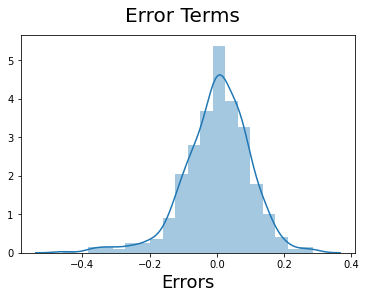

In [76]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### Applying the scaling on the test sets

In [77]:
var = ['atemp', 'hum', 'windspeed', 'cnt']
df_test[var] = scaler.fit_transform(df_test[var])

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [80]:
y_pred = lr_2.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

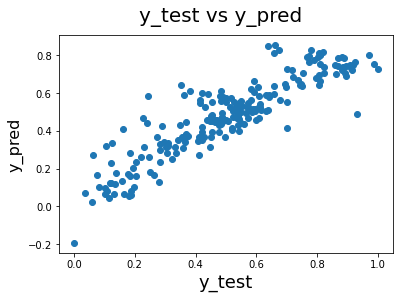

In [81]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7845401839839735